## Predictions

In [2]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

In [2]:
train = pd.read_csv('data/santander-value-prediction-challenge/train.csv')
print(train.shape)
train.head()

(4459, 4993)


,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('data/santander-value-prediction-challenge/test.csv')
print(test.shape)
test.head()

(49342, 4992)


,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Finding the columns of interest, those with a correlation over 0.2 to the target.

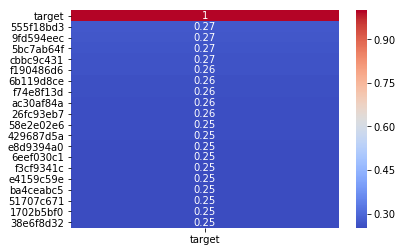

In [4]:
# calculating the correlation of the training data to the 'target' feature
corr = train.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']].head(20), annot=True, cmap='coolwarm')

In [6]:
# determining the features where the correlation to the target is greater than 0.2

features_of_interest = []
for col in corr_sort[['target']].T.columns:
    if corr_sort[['target']].loc[col].values > 0.2:
        features_of_interest.append(col)

features_of_interest


['target',
 '555f18bd3',
 '9fd594eec',
 '5bc7ab64f',
 'cbbc9c431',
 'f190486d6',
 '6b119d8ce',
 'f74e8f13d',
 'ac30af84a',
 '26fc93eb7',
 '58e2e02e6',
 '429687d5a',
 'e8d9394a0',
 '6eef030c1',
 'f3cf9341c',
 'e4159c59e',
 'ba4ceabc5',
 '51707c671',
 '1702b5bf0',
 '38e6f8d32',
 'f296082ec',
 '41bc25fef',
 'f1851d155',
 '70feb1494',
 '0d5215715',
 '6d2ece683',
 'ad207f7bb',
 '174edf08a',
 '1fd0a1f2a',
 'd79736965',
 '7af000ac2',
 '93ca30057',
 'd4c1de0e2',
 '53a550111',
 '88d29cfaf',
 'ea4887e6b',
 'e1d0e11b5',
 '64534cc93',
 'aeff360c7',
 '134ac90df',
 '9c42bff81',
 '341daa7d1',
 '0e1f6696a',
 'fc99f9426',
 '698d05d29',
 '9d5c7cb94',
 'f14b57b8f',
 'a8dd5cea5',
 'fb49e4212',
 '3a62b36bd',
 '96b6bd42b',
 '2570e2ba9',
 'eeb9cd3aa',
 '58232a6fb',
 'c671db79e',
 '716e7d74d',
 'ddea5dc65',
 'a61aa00b0',
 '415094079',
 'cf488d633',
 'be2e15279',
 'c8d582dd2',
 '1c71183bb',
 'c8fdf5cbf',
 'e43343256',
 '26417dec4',
 '2b2b5187e',
 '963a49cdc',
 '20aa07010',
 'c10f31664',
 '11114a47a',
 '62fb564

### Let's build a model.

In [36]:
columns = [col for col in features_of_interest if col != 'target']

X = train[columns]
y = train['target']

In [37]:
columns

['555f18bd3',
 '9fd594eec',
 '5bc7ab64f',
 'cbbc9c431',
 'f190486d6',
 '6b119d8ce',
 'f74e8f13d',
 'ac30af84a',
 '26fc93eb7',
 '58e2e02e6',
 '429687d5a',
 'e8d9394a0',
 '6eef030c1',
 'f3cf9341c',
 'e4159c59e',
 'ba4ceabc5',
 '51707c671',
 '1702b5bf0',
 '38e6f8d32',
 'f296082ec',
 '41bc25fef',
 'f1851d155',
 '70feb1494',
 '0d5215715',
 '6d2ece683',
 'ad207f7bb',
 '174edf08a',
 '1fd0a1f2a',
 'd79736965',
 '7af000ac2',
 '93ca30057',
 'd4c1de0e2',
 '53a550111',
 '88d29cfaf',
 'ea4887e6b',
 'e1d0e11b5',
 '64534cc93',
 'aeff360c7',
 '134ac90df',
 '9c42bff81',
 '341daa7d1',
 '0e1f6696a',
 'fc99f9426',
 '698d05d29',
 '9d5c7cb94',
 'f14b57b8f',
 'a8dd5cea5',
 'fb49e4212',
 '3a62b36bd',
 '96b6bd42b',
 '2570e2ba9',
 'eeb9cd3aa',
 '58232a6fb',
 'c671db79e',
 '716e7d74d',
 'ddea5dc65',
 'a61aa00b0',
 '415094079',
 'cf488d633',
 'be2e15279',
 'c8d582dd2',
 '1c71183bb',
 'c8fdf5cbf',
 'e43343256',
 '26417dec4',
 '2b2b5187e',
 '963a49cdc',
 '20aa07010',
 'c10f31664',
 '11114a47a',
 '62fb56487',
 '0df1

In [42]:
len(columns)

141

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.33,
                                                    random_state=42)

In [39]:
# Instantiate a standard scale
ss = StandardScaler()

# fit and scale X_train
Xs_train = ss.fit_transform(X_train)

# # scale X_test
Xs_test = ss.transform(X_test)

In [40]:
# df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
train_df_scaled = pd.DataFrame(Xs_train, columns = X_train.columns)
train_df_scaled.head()

,555f18bd3,9fd594eec,5bc7ab64f,cbbc9c431,f190486d6,6b119d8ce,f74e8f13d,ac30af84a,26fc93eb7,58e2e02e6,...,703885424,f02ecb19c,23310aa6f,8d12d44e1,122c135ed,77deffdf0,ba136ae3f,0572565c2,d7d314edc,6619d81fc
0,-0.138994,-0.322231,-0.143436,-0.144853,1.519010,-0.133755,1.228562,-0.141731,-0.311721,-0.305077,...,0.128833,0.036915,-0.298378,-0.084653,-0.168911,0.036023,-0.114409,-0.299000,-0.176266,-0.294426
1,-0.138994,-0.322231,-0.143436,-0.144853,-0.323232,-0.133755,-0.298001,-0.141731,-0.311721,-0.305077,...,-0.260569,-0.241315,-0.298378,-0.084653,-0.168911,-0.231061,-0.114409,-0.299000,-0.176266,-0.294426
2,-0.138994,-0.322231,-0.143436,-0.144853,-0.323232,-0.133755,-0.298001,-0.141731,1.207261,0.252156,...,-0.260569,-0.241315,3.198142,-0.084653,-0.168911,-0.231061,-0.114409,0.053442,-0.176266,-0.294426
3,-0.138994,-0.322231,-0.143436,-0.144853,-0.323232,-0.133755,-0.298001,-0.141731,-0.311721,-0.305077,...,-0.260569,-0.241315,-0.298378,-0.084653,-0.168911,-0.231061,-0.114409,-0.299000,0.590508,-0.294426
4,-0.138994,-0.322231,-0.143436,-0.144853,-0.323232,-0.133755,-0.298001,-0.141731,-0.292079,-0.305077,...,-0.260569,-0.241315,-0.298378,-0.084653,-0.168911,0.142857,-0.114409,-0.299000,-0.176266,-0.294426


In [41]:
# Instantiate linear regression model.
lm = LinearRegression()

# Fit on Xs_train.
lm.fit(Xs_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Xs_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Xs_test), y_test),4)}.')

Training Score: -2.1422.
Testing Score: -1.2553.


## Lasso Penalty

In [44]:
# gridsearch over 

import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# for i in range(1, 11):
#     print()
#     print(50 + i*5)
#     print()

df = train[columns]
columns = columns #[df.corr()['SalePrice'] > 0.2]

print(f'number of columns: {len(columns)}')
df[columns].head()

# Building a Gridsearch for Lasso Regulariztion

# instantiate descriptors and target in our training model
X = df #.drop(['target'], axis = 1)
y = train['target']

print(f'The shape of X: {X.shape}')
print(f'The shape of y: {y.shape}')
print()

if X.shape[0] == y.shape[0]:

    # train/test split on the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size = 0.80,
                                                        random_state = 75)
    
    # instantiating pipeline for Lasso Regularization
    lasso_pipe = Pipeline([('ss', StandardScaler()),
                             ('lasso', Lasso())
                            ])

    # fitting the pipeline tot eh training data
    lasso_pipe.fit(X_train, y_train)
    
    # preparing the parameters for a gridsearch
    lasso_params = {
        'lasso__alpha': np.logspace(2, 6, 100)}
        
    # instantiating a gridsearch for Lasso
    lasso_gs = GridSearchCV(lasso_pipe, lasso_params, cv=5)
    
    # fitting the training data to the gridsearch
    lasso_gs.fit(X_train, y_train)
    
    
    print('In fitting the model to the training data, the best fit includes the following alpha.')
    # the best score (R2 score)
    print(f'best score: {lasso_gs.best_score_}')

    # the best estimator
    print(f'best estimator: {lasso_gs.best_estimator_}')

    # the best parameter (alpha)
    print(f'best parameter: {lasso_gs.best_params_}')
    
    # time needed to complete calculation
    print(f'time: {round(time.time() - start_time, 3)/60} minutes')
    

number of columns: 141
The shape of X: (4459, 141)
The shape of y: (4459,)

In fitting the model to the training data, the best fit includes the following alpha.
best score: 0.14639780988478543
best estimator: Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=205651.23083486516, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])
best parameter: {'lasso__alpha': 205651.23083486516}
time: 3.3462166666666664 minutes


In [45]:
df_test = test

In [46]:
# First, a general look at the structure of our testing data
print(f'shape of original testing data: \n {df_test.shape}')
print()

print(f'shape of X: \n {X.shape}')
print()

# build target columns based off of the columns in X 
target_columns = df[columns].columns[df[columns].columns != 'target']
print(f'The columns in the target data: \n {list(target_columns)}')
print()

print(f'shape of the testing data: \n {df_test[target_columns].shape}')

target = df_test[target_columns]

# Now, to handle the cells with null values (they are the same 46 cells that needed filled during Analysis 1)
target.fillna(value = 0, inplace=True)

target.isnull().sum()

shape of original testing data: 
 (49342, 4992)

shape of X: 
 (4459, 141)

The columns in the target data: 
 ['555f18bd3', '9fd594eec', '5bc7ab64f', 'cbbc9c431', 'f190486d6', '6b119d8ce', 'f74e8f13d', 'ac30af84a', '26fc93eb7', '58e2e02e6', '429687d5a', 'e8d9394a0', '6eef030c1', 'f3cf9341c', 'e4159c59e', 'ba4ceabc5', '51707c671', '1702b5bf0', '38e6f8d32', 'f296082ec', '41bc25fef', 'f1851d155', '70feb1494', '0d5215715', '6d2ece683', 'ad207f7bb', '174edf08a', '1fd0a1f2a', 'd79736965', '7af000ac2', '93ca30057', 'd4c1de0e2', '53a550111', '88d29cfaf', 'ea4887e6b', 'e1d0e11b5', '64534cc93', 'aeff360c7', '134ac90df', '9c42bff81', '341daa7d1', '0e1f6696a', 'fc99f9426', '698d05d29', '9d5c7cb94', 'f14b57b8f', 'a8dd5cea5', 'fb49e4212', '3a62b36bd', '96b6bd42b', '2570e2ba9', 'eeb9cd3aa', '58232a6fb', 'c671db79e', '716e7d74d', 'ddea5dc65', 'a61aa00b0', '415094079', 'cf488d633', 'be2e15279', 'c8d582dd2', '1c71183bb', 'c8fdf5cbf', 'e43343256', '26417dec4', '2b2b5187e', '963a49cdc', '20aa07010', 'c10f

555f18bd3    0
9fd594eec    0
5bc7ab64f    0
cbbc9c431    0
f190486d6    0
6b119d8ce    0
f74e8f13d    0
ac30af84a    0
26fc93eb7    0
58e2e02e6    0
429687d5a    0
e8d9394a0    0
6eef030c1    0
f3cf9341c    0
e4159c59e    0
ba4ceabc5    0
51707c671    0
1702b5bf0    0
38e6f8d32    0
f296082ec    0
41bc25fef    0
f1851d155    0
70feb1494    0
0d5215715    0
6d2ece683    0
ad207f7bb    0
174edf08a    0
1fd0a1f2a    0
d79736965    0
7af000ac2    0
            ..
cfe749e26    0
bd6da0cca    0
c0d2348b7    0
5831f4c76    0
018ab6a80    0
b30e932ba    0
f97d9431e    0
482715cbd    0
bb0ce54e9    0
c00611668    0
1db387535    0
91f701ba2    0
ea772e115    0
2ec5b290f    0
27461b158    0
fa11da6df    0
241f0f867    0
1931ccfdd    0
58e056e12    0
150dc0956    0
703885424    0
f02ecb19c    0
23310aa6f    0
8d12d44e1    0
122c135ed    0
77deffdf0    0
ba136ae3f    0
0572565c2    0
d7d314edc    0
6619d81fc    0
Length: 141, dtype: int64

In [47]:
columns

['555f18bd3',
 '9fd594eec',
 '5bc7ab64f',
 'cbbc9c431',
 'f190486d6',
 '6b119d8ce',
 'f74e8f13d',
 'ac30af84a',
 '26fc93eb7',
 '58e2e02e6',
 '429687d5a',
 'e8d9394a0',
 '6eef030c1',
 'f3cf9341c',
 'e4159c59e',
 'ba4ceabc5',
 '51707c671',
 '1702b5bf0',
 '38e6f8d32',
 'f296082ec',
 '41bc25fef',
 'f1851d155',
 '70feb1494',
 '0d5215715',
 '6d2ece683',
 'ad207f7bb',
 '174edf08a',
 '1fd0a1f2a',
 'd79736965',
 '7af000ac2',
 '93ca30057',
 'd4c1de0e2',
 '53a550111',
 '88d29cfaf',
 'ea4887e6b',
 'e1d0e11b5',
 '64534cc93',
 'aeff360c7',
 '134ac90df',
 '9c42bff81',
 '341daa7d1',
 '0e1f6696a',
 'fc99f9426',
 '698d05d29',
 '9d5c7cb94',
 'f14b57b8f',
 'a8dd5cea5',
 'fb49e4212',
 '3a62b36bd',
 '96b6bd42b',
 '2570e2ba9',
 'eeb9cd3aa',
 '58232a6fb',
 'c671db79e',
 '716e7d74d',
 'ddea5dc65',
 'a61aa00b0',
 '415094079',
 'cf488d633',
 'be2e15279',
 'c8d582dd2',
 '1c71183bb',
 'c8fdf5cbf',
 'e43343256',
 '26417dec4',
 '2b2b5187e',
 '963a49cdc',
 '20aa07010',
 'c10f31664',
 '11114a47a',
 '62fb56487',
 '0df1

In [48]:
# converting data using our transformation functions from above
target = df_test[columns]

# Now, let's make predictions

print(f'The average predicted value is:')
print()

print(f'Lasso: {lasso_gs.predict(target).mean()}')


# Now we have one prediction  

pred_lasso = lasso_gs.predict(target)

The average predicted value is:

Lasso: 5407762.04162791


In [50]:
pred_lasso

array([4629462.39643126, 4629462.39643126, 4868030.83623853, ...,
       4630814.41214629, 4716048.72848218, 4629462.39643126])

In [53]:
# convert our numpy arrays to a csv forma
df_test[['ID']].join(pd.DataFrame(pred_lasso, columns=['target'])).to_csv("data/lasso_sub.csv", index=False)

## Ridge

In [60]:
# gridsearch over 

import warnings
warnings.filterwarnings('ignore')

import time
start_time = time.time()

# for i in range(1, 11):
#     print()
#     print(50 + i*5)
#     print()

df = train[columns]
columns = columns #[df.corr()['SalePrice'] > 0.2]

print(f'number of columns: {len(columns)}')
df[columns].head()

# Building a Gridsearch for Lasso Regulariztion

# instantiate descriptors and target in our training model
X = df #.drop(['target'], axis = 1)
y = train['target']

print(f'The shape of X: {X.shape}')
print(f'The shape of y: {y.shape}')
print()

if X.shape[0] == y.shape[0]:

    # train/test split on the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size = 0.80,
                                                        random_state = 75)
    
    # instantiating pipeline for Lasso Regularization
    ridge_pipe = Pipeline([('ss', StandardScaler()),
                             ('ridge', Ridge())
                            ])

    # fitting the pipeline tot eh training data
    ridge_pipe.fit(X_train, y_train)
    
    # preparing the parameters for a gridsearch
    ridge_params = {
        'ridge__alpha': np.logspace(-3, 6, 100),
        'ridge__max_iter': [1, 50, 1000]
    }
        
    # instantiating a gridsearch for Lasso
    ridge_gs = GridSearchCV(ridge_pipe, ridge_params, cv=5)
    
    # fitting the training data to the gridsearch
    ridge_gs.fit(X_train, y_train)
    
    
    print('In fitting the model to the training data, the best fit includes the following alpha.')
    # the best score (R2 score)
    print(f'best score: {ridge_gs.best_score_}')

    # the best estimator
    print(f'best estimator: {ridge_gs.best_estimator_}')

    # the best parameter (alpha)
    print(f'best parameter: {ridge_gs.best_params_}')
    
    # time needed to complete calculation
    print(f'time: {round(time.time() - start_time, 3)/60} minutes')
    

number of columns: 141
The shape of X: (4459, 141)
The shape of y: (4459,)

In fitting the model to the training data, the best fit includes the following alpha.
best score: 0.15156529145355763
best estimator: Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=3511.1917342151346, copy_X=True, fit_intercept=True, max_iter=1,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
best parameter: {'ridge__alpha': 3511.1917342151346, 'ridge__max_iter': 1}
time: 1.1631833333333332 minutes


In [61]:
df_test = test

In [62]:
# First, a general look at the structure of our testing data
print(f'shape of original testing data: \n {df_test.shape}')
print()

print(f'shape of X: \n {X.shape}')
print()

# build target columns based off of the columns in X 
target_columns = df[columns].columns[df[columns].columns != 'target']
print(f'The columns in the target data: \n {list(target_columns)}')
print()

print(f'shape of the testing data: \n {df_test[target_columns].shape}')

target = df_test[target_columns]

# Now, to handle the cells with null values (they are the same 46 cells that needed filled during Analysis 1)
target.fillna(value = 0, inplace=True)

target.isnull().sum()

shape of original testing data: 
 (49342, 4992)

shape of X: 
 (4459, 141)

The columns in the target data: 
 ['555f18bd3', '9fd594eec', '5bc7ab64f', 'cbbc9c431', 'f190486d6', '6b119d8ce', 'f74e8f13d', 'ac30af84a', '26fc93eb7', '58e2e02e6', '429687d5a', 'e8d9394a0', '6eef030c1', 'f3cf9341c', 'e4159c59e', 'ba4ceabc5', '51707c671', '1702b5bf0', '38e6f8d32', 'f296082ec', '41bc25fef', 'f1851d155', '70feb1494', '0d5215715', '6d2ece683', 'ad207f7bb', '174edf08a', '1fd0a1f2a', 'd79736965', '7af000ac2', '93ca30057', 'd4c1de0e2', '53a550111', '88d29cfaf', 'ea4887e6b', 'e1d0e11b5', '64534cc93', 'aeff360c7', '134ac90df', '9c42bff81', '341daa7d1', '0e1f6696a', 'fc99f9426', '698d05d29', '9d5c7cb94', 'f14b57b8f', 'a8dd5cea5', 'fb49e4212', '3a62b36bd', '96b6bd42b', '2570e2ba9', 'eeb9cd3aa', '58232a6fb', 'c671db79e', '716e7d74d', 'ddea5dc65', 'a61aa00b0', '415094079', 'cf488d633', 'be2e15279', 'c8d582dd2', '1c71183bb', 'c8fdf5cbf', 'e43343256', '26417dec4', '2b2b5187e', '963a49cdc', '20aa07010', 'c10f

555f18bd3    0
9fd594eec    0
5bc7ab64f    0
cbbc9c431    0
f190486d6    0
6b119d8ce    0
f74e8f13d    0
ac30af84a    0
26fc93eb7    0
58e2e02e6    0
429687d5a    0
e8d9394a0    0
6eef030c1    0
f3cf9341c    0
e4159c59e    0
ba4ceabc5    0
51707c671    0
1702b5bf0    0
38e6f8d32    0
f296082ec    0
41bc25fef    0
f1851d155    0
70feb1494    0
0d5215715    0
6d2ece683    0
ad207f7bb    0
174edf08a    0
1fd0a1f2a    0
d79736965    0
7af000ac2    0
            ..
cfe749e26    0
bd6da0cca    0
c0d2348b7    0
5831f4c76    0
018ab6a80    0
b30e932ba    0
f97d9431e    0
482715cbd    0
bb0ce54e9    0
c00611668    0
1db387535    0
91f701ba2    0
ea772e115    0
2ec5b290f    0
27461b158    0
fa11da6df    0
241f0f867    0
1931ccfdd    0
58e056e12    0
150dc0956    0
703885424    0
f02ecb19c    0
23310aa6f    0
8d12d44e1    0
122c135ed    0
77deffdf0    0
ba136ae3f    0
0572565c2    0
d7d314edc    0
6619d81fc    0
Length: 141, dtype: int64

In [63]:
columns

['555f18bd3',
 '9fd594eec',
 '5bc7ab64f',
 'cbbc9c431',
 'f190486d6',
 '6b119d8ce',
 'f74e8f13d',
 'ac30af84a',
 '26fc93eb7',
 '58e2e02e6',
 '429687d5a',
 'e8d9394a0',
 '6eef030c1',
 'f3cf9341c',
 'e4159c59e',
 'ba4ceabc5',
 '51707c671',
 '1702b5bf0',
 '38e6f8d32',
 'f296082ec',
 '41bc25fef',
 'f1851d155',
 '70feb1494',
 '0d5215715',
 '6d2ece683',
 'ad207f7bb',
 '174edf08a',
 '1fd0a1f2a',
 'd79736965',
 '7af000ac2',
 '93ca30057',
 'd4c1de0e2',
 '53a550111',
 '88d29cfaf',
 'ea4887e6b',
 'e1d0e11b5',
 '64534cc93',
 'aeff360c7',
 '134ac90df',
 '9c42bff81',
 '341daa7d1',
 '0e1f6696a',
 'fc99f9426',
 '698d05d29',
 '9d5c7cb94',
 'f14b57b8f',
 'a8dd5cea5',
 'fb49e4212',
 '3a62b36bd',
 '96b6bd42b',
 '2570e2ba9',
 'eeb9cd3aa',
 '58232a6fb',
 'c671db79e',
 '716e7d74d',
 'ddea5dc65',
 'a61aa00b0',
 '415094079',
 'cf488d633',
 'be2e15279',
 'c8d582dd2',
 '1c71183bb',
 'c8fdf5cbf',
 'e43343256',
 '26417dec4',
 '2b2b5187e',
 '963a49cdc',
 '20aa07010',
 'c10f31664',
 '11114a47a',
 '62fb56487',
 '0df1

In [64]:
# converting data using our transformation functions from above
target = df_test[columns]

# Now, let's make predictions

print(f'The average predicted value is:')
print()

print(f'Lasso: {ridge_gs.predict(target).mean()}')


# Now we have one prediction  

pred_ridge = ridge_gs.predict(target)

The average predicted value is:

Lasso: 5439673.626348042


In [67]:
pred_ridge = np.absolute(pred_ridge)

In [68]:
# convert our numpy arrays to a csv forma
df_test[['ID']].join(pd.DataFrame(pred_ridge, columns=['target'])).to_csv("data/ridge_sub.csv", index=False)

## Third submission

In [69]:
lm = LinearRegression()

In [71]:
Xs_train.shape

(2987, 141)

In [73]:
y_train.shape

(3567,)

In [70]:
lm.fit(Xs_train)

ValueError: Found input variables with inconsistent numbers of samples: [2987, 3567]

In [75]:
# determining the features where the correlation to the target is greater than 0.2

features_of_interest = []
for col in corr_sort[['target']].T.columns:
    if corr_sort[['target']].loc[col].values > 0.2:
        features_of_interest.append(col)

features_of_interest


['target',
 '555f18bd3',
 '9fd594eec',
 '5bc7ab64f',
 'cbbc9c431',
 'f190486d6',
 '6b119d8ce',
 'f74e8f13d',
 'ac30af84a',
 '26fc93eb7',
 '58e2e02e6',
 '429687d5a',
 'e8d9394a0',
 '6eef030c1',
 'f3cf9341c',
 'e4159c59e',
 'ba4ceabc5',
 '51707c671',
 '1702b5bf0',
 '38e6f8d32',
 'f296082ec',
 '41bc25fef',
 'f1851d155',
 '70feb1494',
 '0d5215715',
 '6d2ece683',
 'ad207f7bb',
 '174edf08a',
 '1fd0a1f2a',
 'd79736965',
 '7af000ac2',
 '93ca30057',
 'd4c1de0e2',
 '53a550111',
 '88d29cfaf',
 'ea4887e6b',
 'e1d0e11b5',
 '64534cc93',
 'aeff360c7',
 '134ac90df',
 '9c42bff81',
 '341daa7d1',
 '0e1f6696a',
 'fc99f9426',
 '698d05d29',
 '9d5c7cb94',
 'f14b57b8f',
 'a8dd5cea5',
 'fb49e4212',
 '3a62b36bd',
 '96b6bd42b',
 '2570e2ba9',
 'eeb9cd3aa',
 '58232a6fb',
 'c671db79e',
 '716e7d74d',
 'ddea5dc65',
 'a61aa00b0',
 '415094079',
 'cf488d633',
 'be2e15279',
 'c8d582dd2',
 '1c71183bb',
 'c8fdf5cbf',
 'e43343256',
 '26417dec4',
 '2b2b5187e',
 '963a49cdc',
 '20aa07010',
 'c10f31664',
 '11114a47a',
 '62fb564

In [76]:
columns = [col for col in features_of_interest if col != 'target']

X = train[columns]
y = train['target']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.33,
                                                    random_state=42)

In [78]:
# Instantiate a standard scale
ss = StandardScaler()

# fit and scale X_train
Xs_train = ss.fit_transform(X_train)

# # scale X_test
Xs_test = ss.transform(X_test)

In [79]:
# Instantiate linear regression model.
lm = LinearRegression()

# Fit on Xs_train.
lm.fit(Xs_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(r2_score(lm.predict(Xs_train), y_train),4)}.')
print(f'Testing Score: {round(r2_score(lm.predict(Xs_test), y_test),4)}.')

Training Score: -2.1422.
Testing Score: -1.2553.


In [80]:
lm.predict(test[columns])

array([-6.27181292e+08,  6.00229769e+06,  6.82195403e+12, ...,
       -1.78692480e+12,  8.47848668e+11, -9.97597700e+11])

In [81]:
linear_pred = np.absolute(lm.predict(test[columns]))

In [82]:
# convert our numpy arrays to a csv forma
df_test[['ID']].join(pd.DataFrame(linear_pred, columns=['target'])).to_csv("data/linear_sub.csv", index=False)

In [3]:
boost = xgb()

TypeError: 'module' object is not callable